In [1]:
import pandas as pd

# Load your x_test
x_train = pd.read_csv('../../outputs/Assignment_3/x_train.csv')
y_train = pd.read_csv('../../outputs/Assignment_3/y_train.csv').values.ravel()

# Feature extraction
x_train['Total Credits'] = x_train['Curricular units 1st sem (credited)'] + x_train['Curricular units 2nd sem (credited)']
x_train['Total Enrolled Units'] = x_train['Curricular units 1st sem (enrolled)'] + x_train['Curricular units 2nd sem (enrolled)']
x_train['Total Approved Units'] = x_train['Curricular units 1st sem (approved)'] + x_train['Curricular units 2nd sem (approved)']

# Calculate average grades for students who have grades available
x_train['Average Grade'] = x_train[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean(axis=1)

# Binary features for key indicators
x_train['Is International Student'] = x_train['International'].apply(lambda x: 1 if x == 1 else 0)
x_train['Is Debtor'] = x_train['Debtor'].apply(lambda x: 1 if x == 1 else 0)
x_train['Has Scholarship'] = x_train['Scholarship holder'].apply(lambda x: 1 if x == 1 else 0)

# Display the new features
new_features = ['Total Credits', 'Total Enrolled Units', 'Total Approved Units',
                'Average Grade', 'Is International Student', 'Is Debtor', 'Has Scholarship']

print("Extracted Features:")
print(x_train[new_features].head())


Extracted Features:
   Total Credits  Total Enrolled Units  Total Approved Units  Average Grade  \
0      -0.680468             -1.592437             -3.192790      -2.088273   
1      -0.680468             -0.311829             -1.406310       0.220247   
2      -0.680468             -0.311829              1.066153       0.701705   
3      -0.680468             -0.311829             -3.192790      -2.088273   
4      -0.680468              0.968779              1.066153       0.700528   

   Is International Student  Is Debtor  Has Scholarship  
0                         0          0                0  
1                         0          0                0  
2                         0          0                0  
3                         0          0                0  
4                         0          0                0  


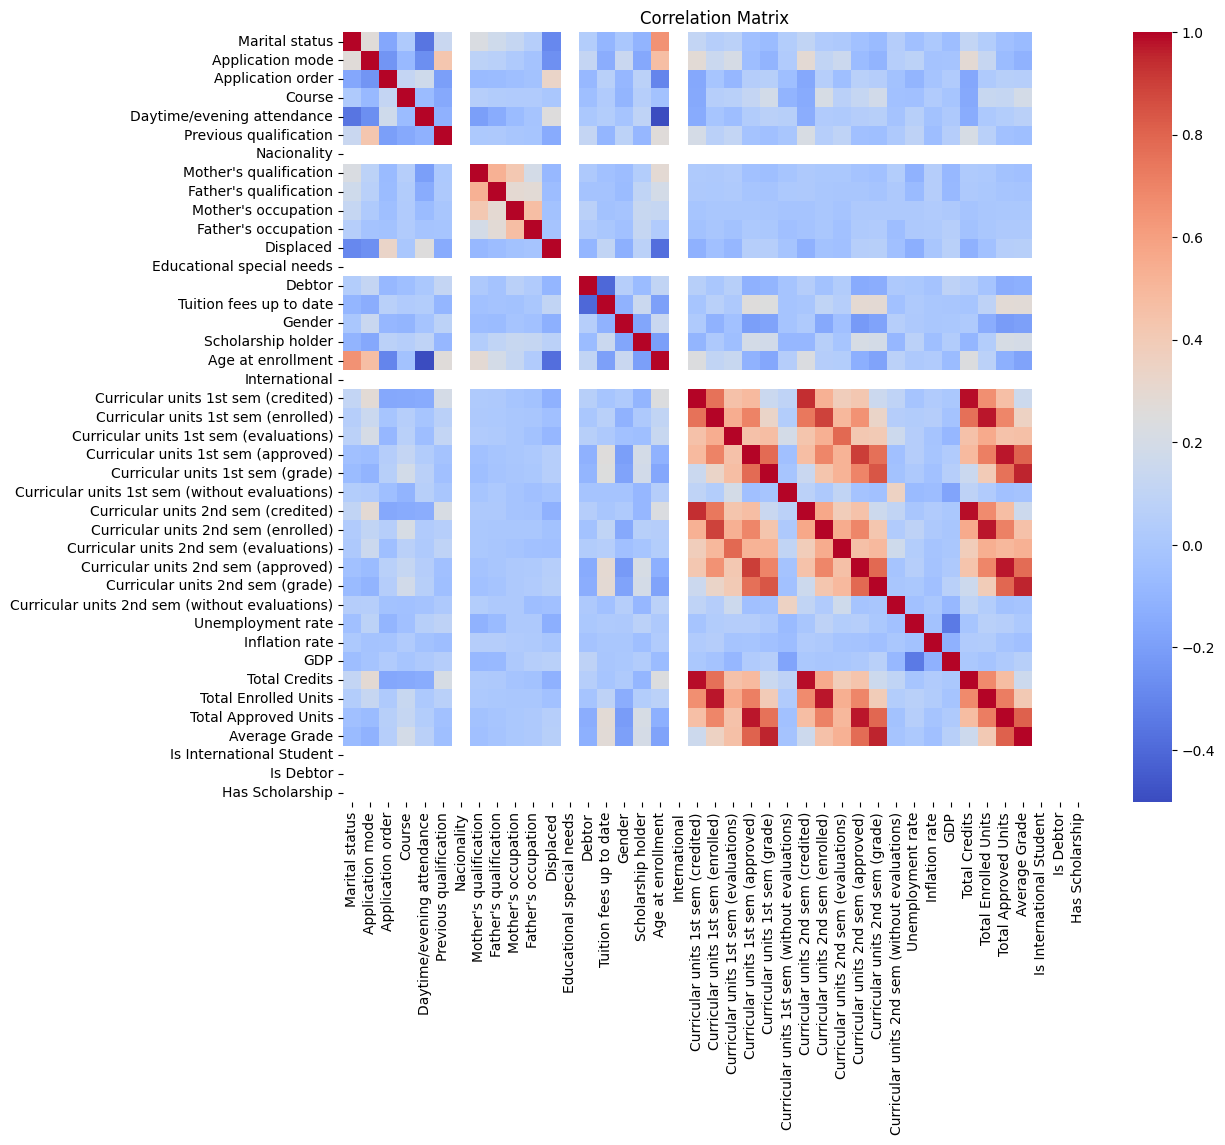

Data with feature extraction applied has been saved to ../../outputs/Assignment_3/extracted_features_data.csv.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Correlation Matrix (optional, just for feature analysis)
correlation_matrix = x_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Combine X and y into a single dataFrame for saving
final_x_train = x_train.copy()
final_x_train['Target'] = y_train

# Save the x_train to a new file with feature extraction applied
output_path = '../../outputs/Assignment_3/extracted_features_data.csv'  # Adjust path as needed
final_x_train.to_csv(output_path, index=False)

print(f"Data with feature extraction applied has been saved to {output_path}.")

In [3]:
x_test = pd.read_csv('../../outputs/Assignment_3/x_test.csv')
y_test = pd.read_csv('../../outputs/Assignment_3/y_test.csv').values.ravel()

# Feature extraction
x_test['Total Credits'] = x_test['Curricular units 1st sem (credited)'] + x_test['Curricular units 2nd sem (credited)']
x_test['Total Enrolled Units'] = x_test['Curricular units 1st sem (enrolled)'] + x_test['Curricular units 2nd sem (enrolled)']
x_test['Total Approved Units'] = x_test['Curricular units 1st sem (approved)'] + x_test['Curricular units 2nd sem (approved)']

# Calculate average grades for students who have grades available
x_test['Average Grade'] = x_test[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean(axis=1)

# Binary features for key indicators
x_test['Is International Student'] = x_test['International'].apply(lambda x: 1 if x == 1 else 0)
x_test['Is Debtor'] = x_test['Debtor'].apply(lambda x: 1 if x == 1 else 0)
x_test['Has Scholarship'] = x_test['Scholarship holder'].apply(lambda x: 1 if x == 1 else 0)

# Standardize the test data using the scaler fitted on the training data
x_test_scaled = scaler.transform(x_test)

# Apply the PCA transformation to the scaled test data
x_test_pca = pca.transform(x_test_scaled)

# Save the PCA-transformed test data in a DataFrame
x_test_pca_df = pd.DataFrame(x_test_pca, columns=pca_columns)
x_test_pca_df['Target'] = y_test  # Add the target column

# Optional: Save the transformed test data to CSV if needed
pca_test_output_path = '../../outputs/Assignment_3/extracted_features_pca_test_data.csv'
x_test_pca_df.to_csv(pca_test_output_path, index=False)
print(f"PCA-transformed test data saved to {pca_test_output_path}.")


NameError: name 'scaler' is not defined